# Movie Dataset
This dataset contains information about several Movies released during the past 10 years containing there Ranks, Release Dates,	Movie Title, Production Budget,  Worldwide Gross, Domestic Gross.We perform Linear Regression on our dataset to make some predicitons.The data has been collected from 'www.the-numbers.com/movies/budget'

### *The Imports*

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Reading the data

In [3]:
movie = pd.read_csv("2.2 cost_revenue_dirty.csv.csv")
movie.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Cleaning

### Removing Data Cells with 0 Gross Produce

In [6]:
movie.drop(movie[(movie["Worldwide Gross ($)"] == '$0') & (movie["Domestic Gross ($)"] == '$0')].index,inplace=True)

### Removing the commas and dollar sign from the columns

In [7]:
movie['Worldwide Gross ($)'] = movie['Worldwide Gross ($)'].str.replace('$','',regex=True)
movie['Worldwide Gross ($)'] = movie['Worldwide Gross ($)'].str.replace(',','',regex=True)
movie['Domestic Gross ($)'] = movie['Domestic Gross ($)'].str.replace('$','',regex=True)
movie['Domestic Gross ($)'] = movie['Domestic Gross ($)'].str.replace(',','',regex=True)
movie['Production Budget ($)'] = movie['Production Budget ($)'].str.replace('$','',regex=True)
movie['Production Budget ($)'] = movie['Production Budget ($)'].str.replace(',','',regex=True)

In [8]:
movie.tail()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
5378,914,10/2/2017,Fifty Shades Darker,55000000,376856949,114434010
5379,1295,10/2/2017,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,10/3/2017,Kong: Skull Island,185000000,561137727,168052812
5381,94,12/5/2017,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,12/5/2017,Snatched,42000000,57850343,45850343


### Changing the column names for Production Budget, Worldwide Gross and Domestic Gross

In [9]:
movie.rename(columns={'Production Budget ($)':'Production_Budget','Worldwide Gross ($)':'Worldwide_Gross','Domestic Gross ($)':'Domestic_Gross'},inplace=True)
movie.head(2)

,Rank,Release Date,Movie Title,Production_Budget,Worldwide_Gross,Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000


#### Changing the data types for gross and production budget

In [10]:
movie['Production_Budget'] = pd.to_numeric(movie['Production_Budget'])
movie['Worldwide_Gross'] = pd.to_numeric(movie['Worldwide_Gross'])
movie['Domestic_Gross'] = pd.to_numeric(movie['Domestic_Gross'])
movie['Release Date'] = pd.to_datetime(movie['Release Date'])

### *Exploratory Data Analysis*

#### Basic Description of our dataset

In [11]:
movie.describe()

,Rank,Production_Budget,Worldwide_Gross,Domestic_Gross
count,5034.000000,5.034000e+03,5.034000e+03,5.034000e+03
mean,2571.987882,3.290784e+07,9.515685e+07,4.415985e+07
std,1513.859403,4.112589e+07,1.726012e+08,6.737926e+07
min,1.000000,1.100000e+03,2.600000e+01,0.000000e+00
25%,1266.250000,6.000000e+06,7.000000e+06,3.209372e+06
50%,2543.500000,1.900000e+07,3.296202e+07,2.034680e+07
75%,3839.750000,4.200000e+07,1.034471e+08,5.600026e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


#### Information about our dataset

In [12]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5034 entries, 0 to 5382
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Rank               5034 non-null   int64         
 1   Release Date       5034 non-null   datetime64[ns]
 2   Movie Title        5034 non-null   object        
 3   Production_Budget  5034 non-null   int64         
 4   Worldwide_Gross    5034 non-null   int64         
 5   Domestic_Gross     5034 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 275.3+ KB


**How many movies were released during 2015 and 2019**

In [13]:
movie[(movie['Release Date'] > '2015-01-01') & (movie['Release Date'] < '2019-12-31')]

,Rank,Release Date,Movie Title,Production_Budget,Worldwide_Gross,Domestic_Gross
4788,3255,2015-01-04,Woman in Gold,11000000,56758138,33307793
4789,10,2015-01-05,Avengers: Age of Ultron,250000000,1404705868,459005868
4790,129,2015-01-07,Terminator: Genisys,155000000,440160956,89760956
4791,2952,2015-01-07,Magic Mike XXL,14500000,123709460,66013057
4792,2947,2015-01-09,Broken Horses,15000000,3471,0
...,...,...,...,...,...,...
5378,914,2017-10-02,Fifty Shades Darker,55000000,376856949,114434010
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


**Movies with production budget greater than 11000000 and released before 2015**

In [14]:
movie[(movie['Production_Budget'] > 11000000) & (movie['Release Date'] < '2015-01-01')]

,Rank,Release Date,Movie Title,Production_Budget,Worldwide_Gross,Domestic_Gross
72,3020,1956-05-10,The Ten Commandments,13500000,80000000,80000000
84,2802,1959-11-18,Ben-Hur,15000000,73000000,73000000
88,3151,1960-07-10,Spartacus,12000000,60000000,30000000
89,3185,1960-10-24,The Alamo,12000000,7900000,7900000
98,2546,1962-08-11,Mutiny on The Bounty,19000000,13680000,13680000
...,...,...,...,...,...,...
4758,716,2014-12-25,Unbroken,65000000,163527824,115637895
4759,882,2014-12-25,American Sniper,58000000,547326372,350126372
4760,1010,2014-12-25,Into the Woods,50000000,203502372,128002372
4763,1434,2014-12-31,Dragon Nest Warriors' Dawn,40000000,196090,0


### *Visualisation*

**Plot a scatterplot for production budget vs worldwide gross**

<AxesSubplot:xlabel='Production_Budget', ylabel='Worldwide_Gross'>

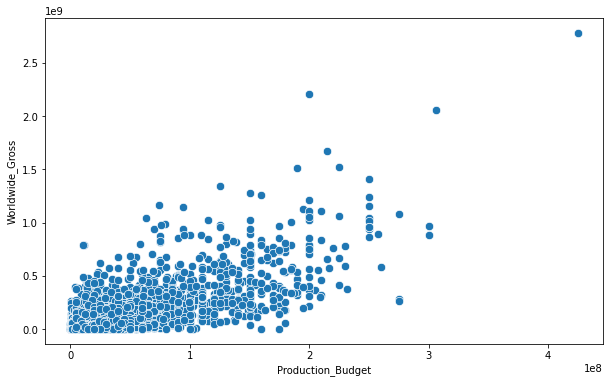

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Production_Budget',y='Worldwide_Gross',data=movie,s=70)

#### Plot a Graph for worldwide gross vs domestic gross

<AxesSubplot:xlabel='Worldwide_Gross', ylabel='Domestic_Gross'>

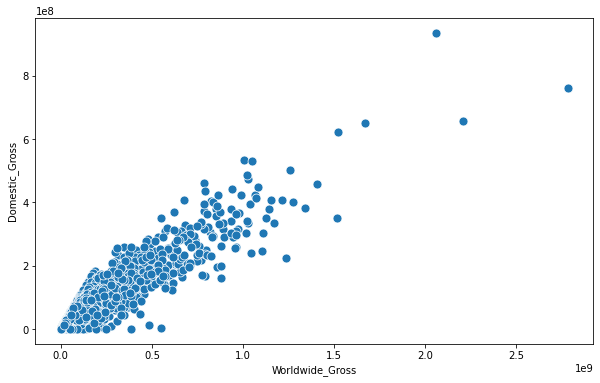

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Worldwide_Gross',y='Domestic_Gross',data=movie,s=80)

**Add a countplot for number of movies released during 2010 and 2015**

In [21]:
movie['Year'] = movie['Release Date'].dt.year
movie[(movie['Year'] > 2010 ) & (movie['Year'] < 2015)]

<AxesSubplot:xlabel='Year', ylabel='count'>

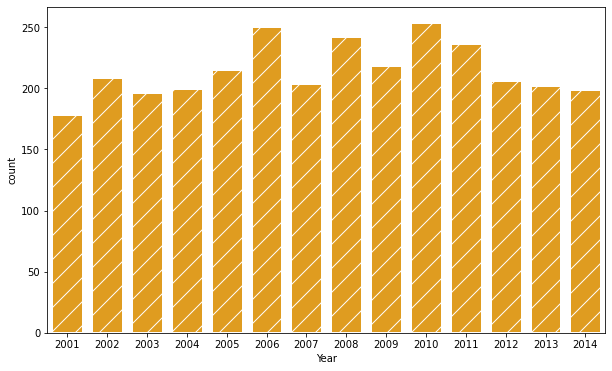

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='Year',data=movie[(movie['Year'] > 2000 ) & (movie['Year'] < 2015)],color='orange',hatch='/',lw=3,ec='white')

### Data Predictions

In [45]:
from sklearn.model_selection import train_test_split

**Divide the data into Training and Testing sets**

In [46]:
movie.columns

Index(['Rank', 'Release Date', 'Movie Title', 'Production_Budget',
       'Worldwide_Gross', 'Domestic_Gross', 'Year'],
      dtype='object')

In [49]:
X = movie[['Production_Budget','Worldwide_Gross']]
y = movie['Domestic_Gross']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

**Training the model using linear regression**

In [51]:
from sklearn.linear_model import LinearRegression

**Create an object of LinearRegression()**

In [52]:
lm =LinearRegression()

**Train/fit your model**

In [53]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [54]:
lm.coef_

array([-0.07248841,  0.37604121])

### Predicting Test Data
#### Now that we have fit our model lets evaluate its performance by predicting off the test values

In [59]:
predictions = lm.predict(X_test)

**Plotting a scatterplot for real test values vs the predicted values**

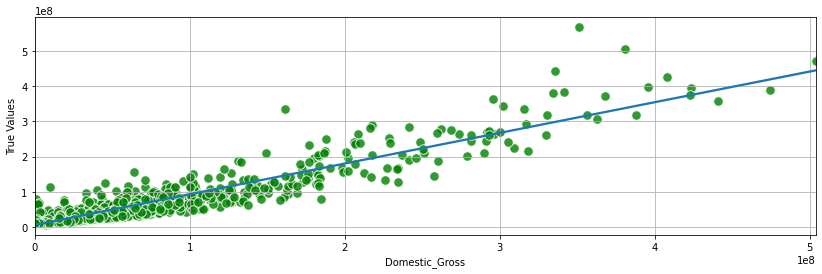

In [93]:
plt.figure(figsize=(14,4))
plt.ylabel('True Values')
sns.regplot(x=y_test,y=predictions,fit_reg=True,ci=25,marker='o',scatter_kws={'color':'green','s':90,'ec':'white'})
plt.grid()

### Evaluate the model
#### Calculate the mean absolute error, mean squared error, and the root mean square error

In [94]:
from sklearn import metrics

In [95]:
print("MAE :",metrics.mean_absolute_error(y_test,predictions))
print("MSE :",metrics.mean_squared_error(y_test,predictions))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 14567656.84410259
MSE : 486570077110453.44
RMSE : 22058333.507100064


#### Explained Variance Score

In [96]:
metrics.explained_variance_score(y_test,predictions)

0.8871133000561661

#### Plot a histogram of the residuals to make sure it looks normally distributed

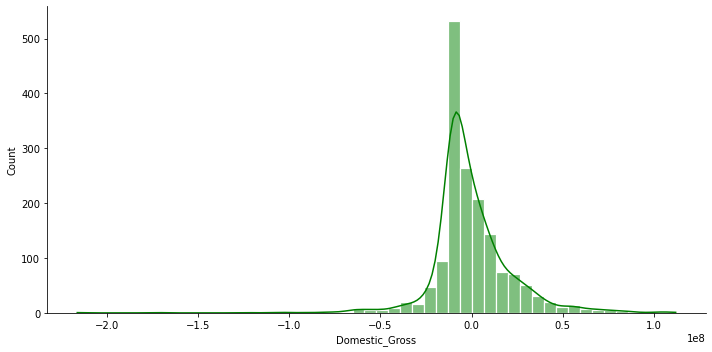

In [117]:
sns.displot(y_test-predictions,bins=50,kde=True,lw=2,edgecolor='white',color='green',aspect=2)

**We need an answer to the question of whether should one invest there money in movie or not**

In [118]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Production_Budget,-0.072488
Worldwide_Gross,0.376041
